# Анализ продаж платформенных игр для магазина "Стримчик"

# Описание проекта
Для магазина «Стримчик», который продаёт по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й г.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


### Краткий план.
Задание будем выполнять в соответсвии с инструкцией, указанной в теоретической части.
**Краткий план:**
 - ознакомимся с данными, проведем максимальную предобработку;
 - проведем исследовательский анализ данных в соответствии с заданиями "Шаг 3" и "Шаг 4";
 - сформулируем и проверим гипотезы;
 - сформулируем вывод.

### Изучение общей информации

Импортируем изученные библиотеки,  прочитаем файл, просмотрим первые строки, информацию, описание датасета, пропуски.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
games = pd.read_csv('/datasets/games.csv')

In [ ]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Вывод

 - столбцы необходимо привести к змеиному регистру
 - имеется большое количество пропусков Critic_Score, User_Score, Rating, которые необходимо обработать
 - столбцы необходимо привести к типу данных, соответствующему содержанию

### Подготовка данных

#### После предварительного анализа данных сделаем следующее:
 - поменяем регистр;
 - поменяем тип данных;
 - удалим строки с пропусками в "name" и "genre", т.к. их всего по 2 строки;
 - удалим строки с пропусками в "Year_of_Release", т.к. год невозможно заполнить ни средним, ни медианным значением, а процент пропусков мал.


In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (16,9), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

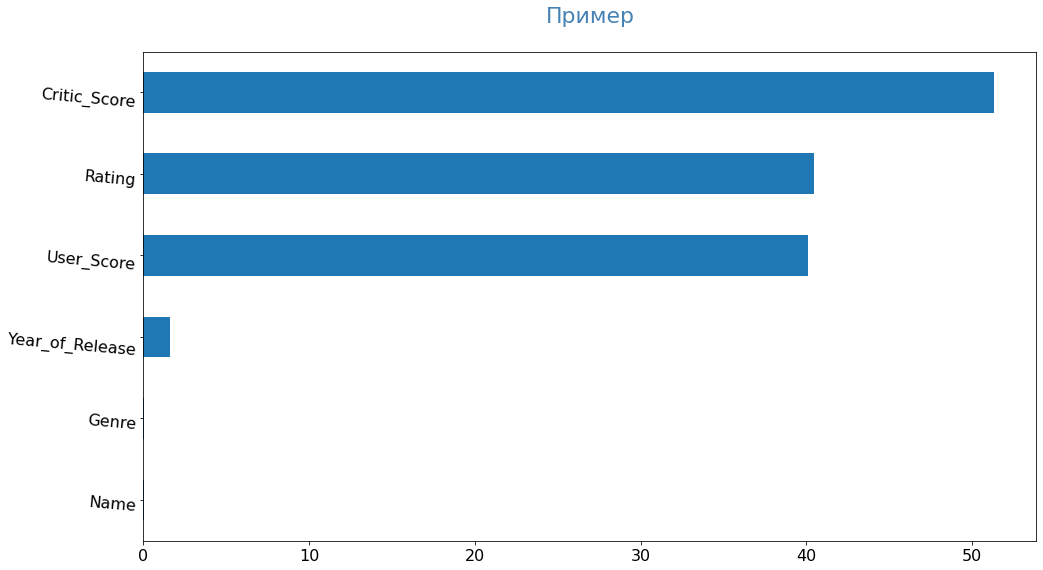

In [ ]:
pass_value_barh(games)

In [ ]:
games.columns = games.columns.str.lower()

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
#games['user_score'] = games['user_score'].astype('float64')

При попытке изменения типа данных с object на float в 'user_score' получена ошибка

*ValueError: could not convert string to float: 'tbd'*

Строку в коде закомментировали.  
tbd - To Be Determined (будет определено). Меняем tbd на NaN.  
Преобразуем тип данных еще раз.

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float64')

In [ ]:
games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [ ]:
games[games.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [ ]:
games = games.dropna(subset = ['name'])
games = games.dropna(subset = ['genre'])
#games = games.dropna(subset = ['year_of_release'])

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


In [ ]:
y_o_r_sales = games[games.year_of_release.isna()]
y_o_r_sales = y_o_r_sales['total_sales'].sum()
y_o_r_sales

98.91999999999999

In [ ]:
games = games.dropna(subset = ['year_of_release'])

#### Пропущенные данные в столбце rating заменим на not_defined

In [ ]:
games['rating'] = games['rating'].fillna('not_defined')

# Вывод

Предобработка данных завершена.

Осталось много пропусков в столбцах critic_score, user_score, однако ими пренебрегать нельзя. Данные могут отсутсвовать в связи с недостаточностью информации о новых релизах или малопопулярных старых продуктах, оценка которых не производилась.

In [ ]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


In [ ]:
# check
games[games.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


In [ ]:
games.duplicated().sum()

0

In [ ]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

### Исследовательский анализ данных

Из описания мы видели, что релизы начинались с 1980 г. и заканчиваются 2016г. Построим гистограмму, определим наиболее важный период.

Text(0, 0.5, 'Количество')

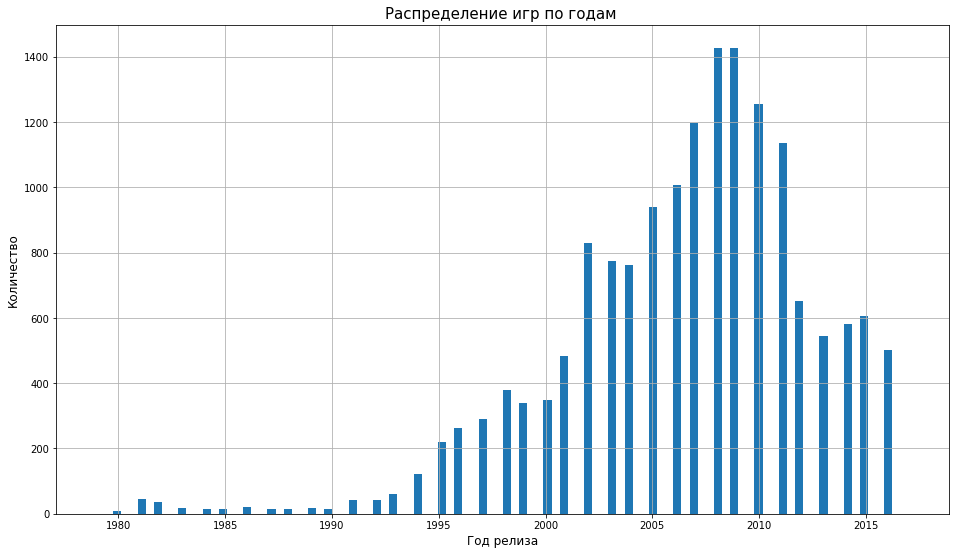

In [ ]:
games['year_of_release'].hist(bins = 100, figsize = (16,9), range=(1979, 2017))
plt.title('Распределение игр по годам ',fontsize=15)
plt.xlabel('Год релиза',fontsize=12)
plt.ylabel('Количество',fontsize=12)

Наибольшее кол-во игр выпускалось в период 2002-2011г. Данные периоды наиболее важны.

#### Найдем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [ ]:
platforms_sort = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)
platforms_sort

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим графики для первых шести.

PS2


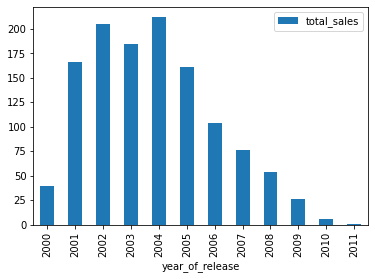

X360


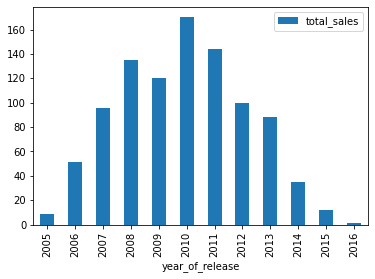

PS3


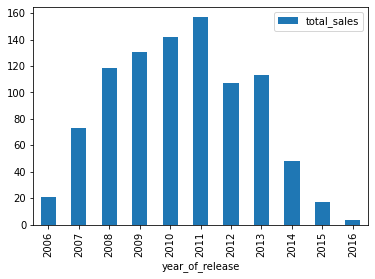

Wii


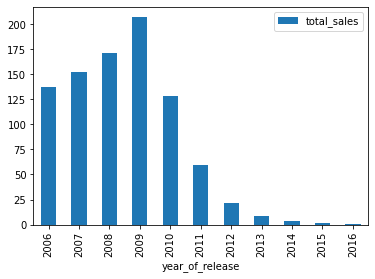

DS


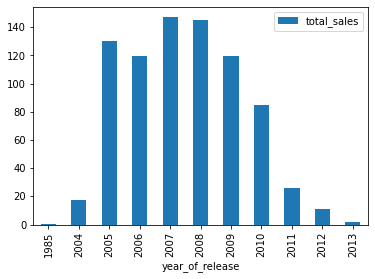

PS


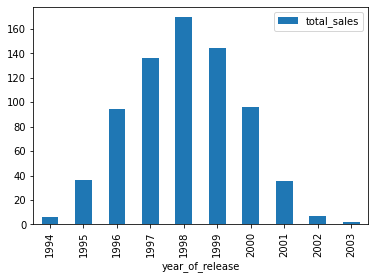

In [ ]:
for platform in platforms_sort.index[:6]:
    print(platform)
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Наглядно видно, что новые платформы меняют старые, резко набирая популярность,  при этом средний пик популярности составляет 4-5 лет. А в целом платформы живут до 10 лет.

#### **Определим актуальный период.**


Т.к. из предыдущего задания мы выяснили, что средний срок пика популярности 4-5 лет, и дополнительно ситуация на рынке резко изменилась в 2012 году, то данные до 2012 года для нас неактуальны. Определим актуальный период как 2012-2016г.

#### **Определим какие платформы лидируют по продажам, растут или падают.**

Выберем несколько потенциально прибыльных платформ.

In [ ]:
actual_games = games.query('year_of_release >= 2014')

In [ ]:
actual_platform_sales = (
    actual_games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
actual_platform_sales

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


PS4


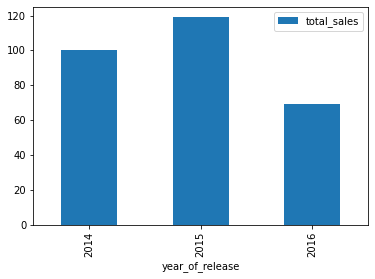

XOne


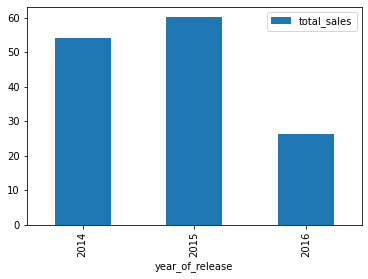

3DS


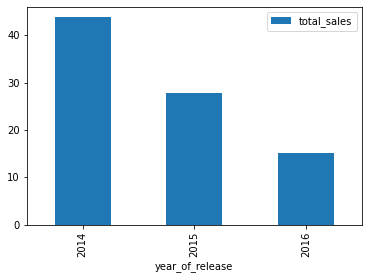

PS3


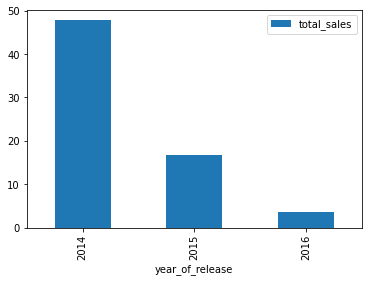

X360


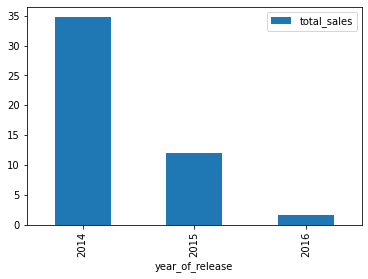

WiiU


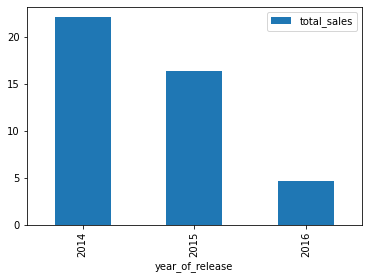

PC


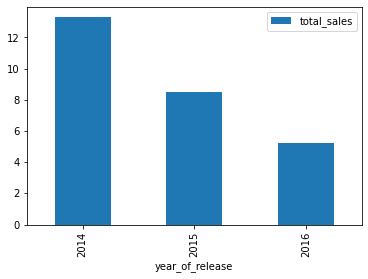

PSV


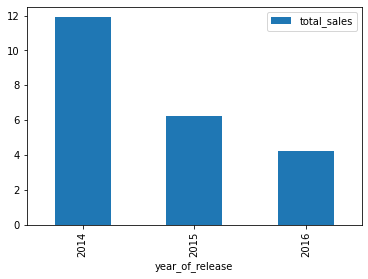

Wii


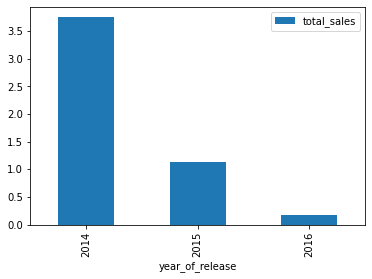

PSP


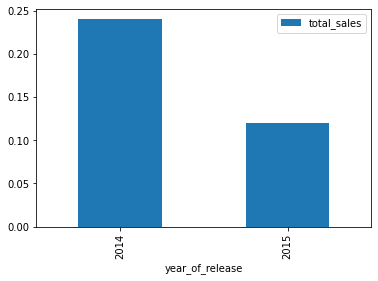

In [ ]:
for platform in actual_platform_sales.index:
    print(platform)
    (actual_games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

# Вывод

Данные показывают, что лидерами являются семейства PS и X-box. Отсюда наиболее перспективными выглядят PS4 и XOne. Добавим еще 3DS по объему продаж и PC по стабильности продаж и продолжительности существования на рынке.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:>

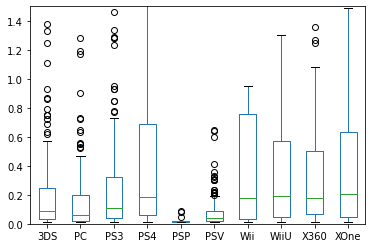

In [ ]:
actual_games.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='box', ylim=(0,1.5))

<AxesSubplot:>

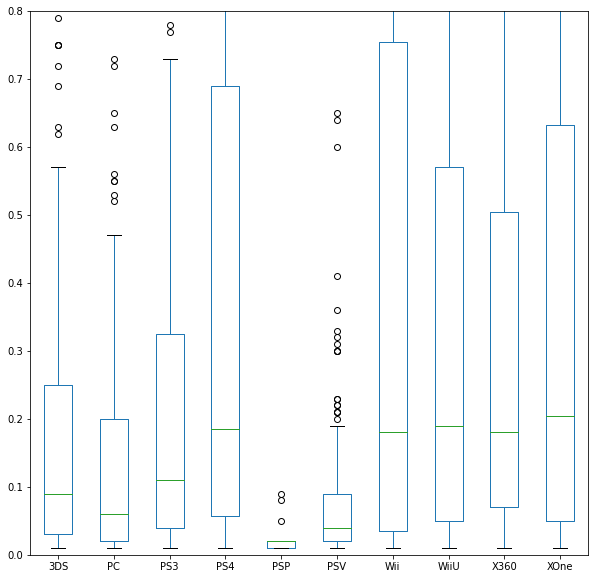

In [ ]:
actual_games.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='box', figsize = (10,10), ylim=(0,0.8))

На графиках PS4, Wii, X360, XOne видно много выбросов. Отнесем их на счет хитовых релизов.

Медианные значения PS3, PS4, WiiU, XOne примерно на одном уровне.

Максимальная медиана у X360, но мы не рассматриваем ее как перспективную, т.к из предыдущих графиков видно, что ей на смену пришла XOne.

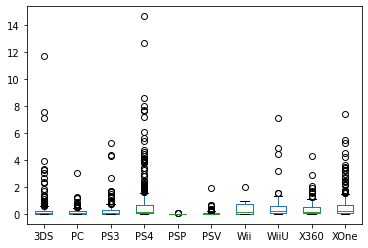

In [ ]:
# check

actual_games.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='box');

#### **Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Возьмем самую популярную платформу PS4

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

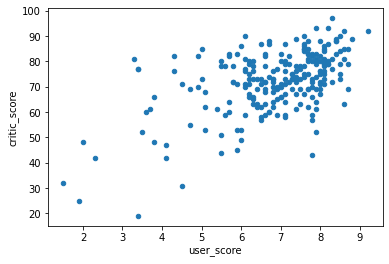

In [ ]:
ps_4 = actual_games.query('platform == "PS4"')
ps_4.plot(x='user_score', y='critic_score', kind='scatter')

Из диаграммы видно, что оценки критиков и пользователей в целом совпадают.

In [ ]:
ps_4_cor = ps_4[['critic_score','user_score', 'total_sales']]
ps_4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


**PS4** - Корреляции между продажами и оценками пользователей нет.
Корреляция между продажами и оценками критиков слабая.
Проверим другие популярные платформы.

In [ ]:
ps_3 = actual_games.query('platform == "PS3"')
x_360 = actual_games.query('platform == "X360"')
D_S = actual_games.query('platform == "3DS"')

In [ ]:
ps_3_cor = ps_3[['critic_score','user_score', 'total_sales']]
ps_3_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000


**PS3** - Корреляции между продажами и оценками пользователей нет. Корреляция между продажами и оценками критиков слабая.

In [ ]:
x_360_cor = x_360[['critic_score','user_score', 'total_sales']]
x_360_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
total_sales,0.525723,-0.138445,1.000000


**X360** - Корреляции между продажами и оценками пользователей нет. Корреляция между продажами и оценками критиков слабая.

In [ ]:
D_S_cor = D_S[['critic_score','user_score', 'total_sales']]
D_S_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
total_sales,0.314117,0.215193,1.000000


**3DS** - Корреляции между продажами и оценками пользователей слабая. Корреляция между продажами и оценками критиков слабая.

По топовым платформам можно сделать вывод, что корреляции между продажами и оценками пользователей нет.

Корреляция между продажами и оценками критиков прослеживается, но слабая.

#### **Посмотрим на распределение продаж игр по жанрам.**

<AxesSubplot:xlabel='genre'>

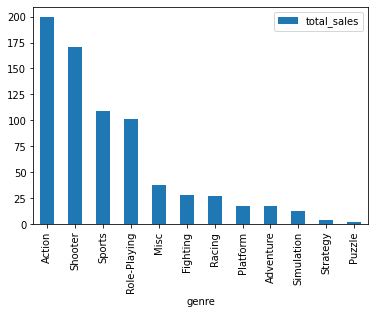

In [ ]:
actual_games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='bar', y= 'total_sales')

Самым популярным жанром является Action, на втором месте Shooter, третье место приблизительно с равными продажами у RPG и Sports.


Наименее прибыльными жанрами являются головоломки и стратегии.

<AxesSubplot:>

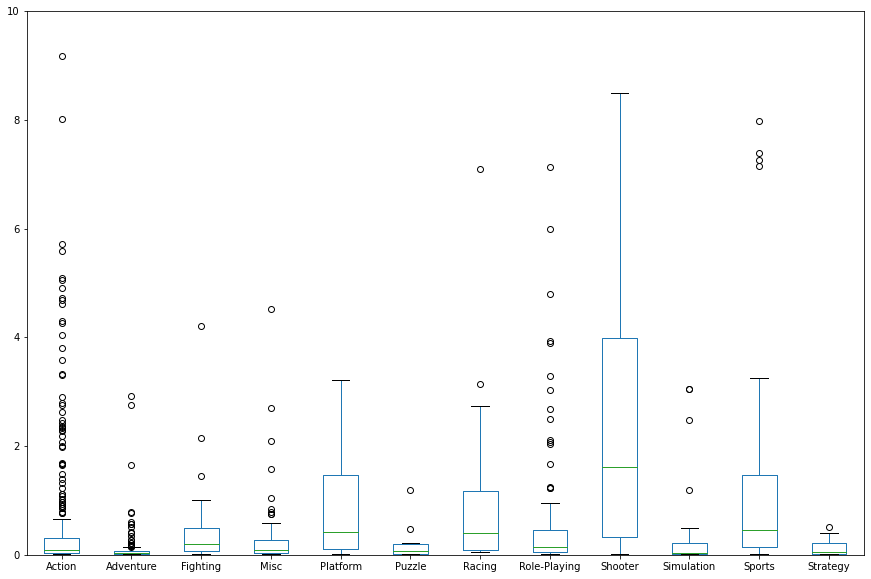

In [ ]:
actual_games.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='box', figsize = (15,10), ylim=(0,10))

<AxesSubplot:>

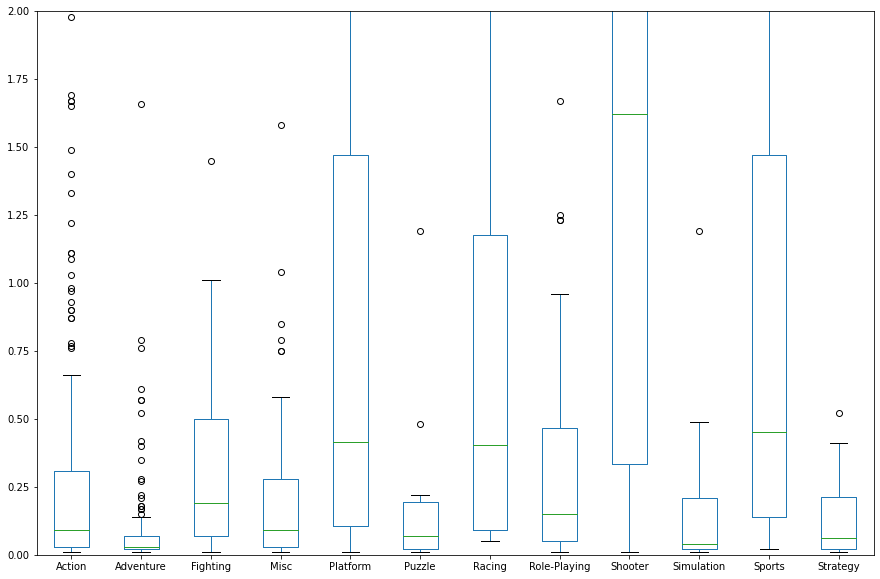

In [ ]:
actual_games.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='box', figsize = (15,10), ylim=(0,2))

### Составление портрета пользователя каждого региона

<AxesSubplot:xlabel='platform'>

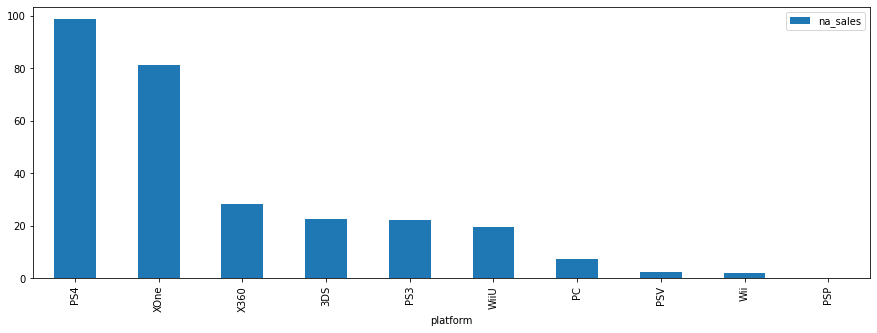

In [ ]:
actual_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='platform'>

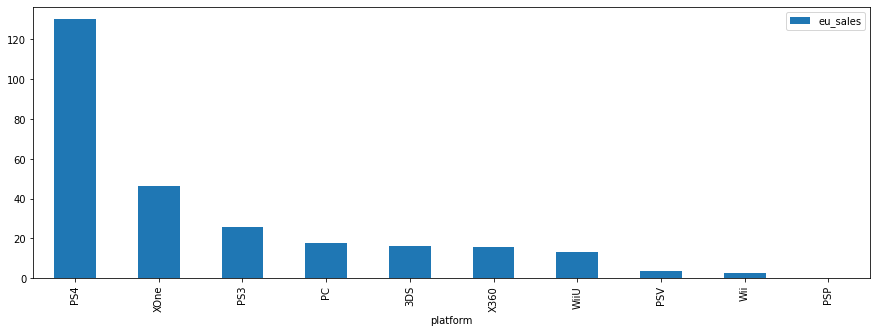

In [ ]:
actual_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='platform'>

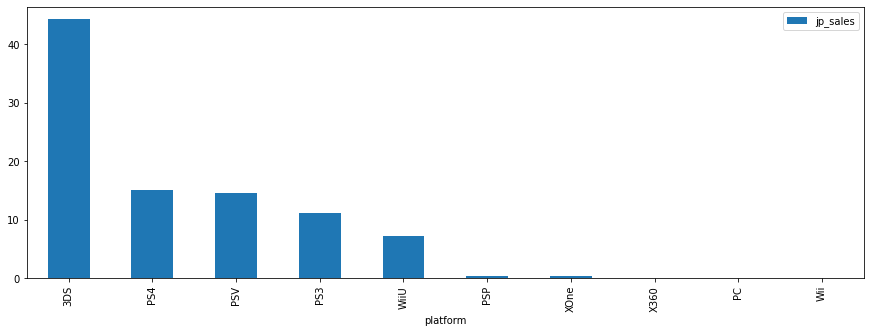

In [ ]:
actual_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

Из графиков видно, что в Америке и Европе наиболее популярны платформы семейства PS и Xbox в Японии с большим отрывом лидирует 3DS от Nintendo, это обусловлено тем, что производитель Nintendo является японской компанией и успешно продвигает продукты на внутреннем рынке.

<AxesSubplot:xlabel='genre'>

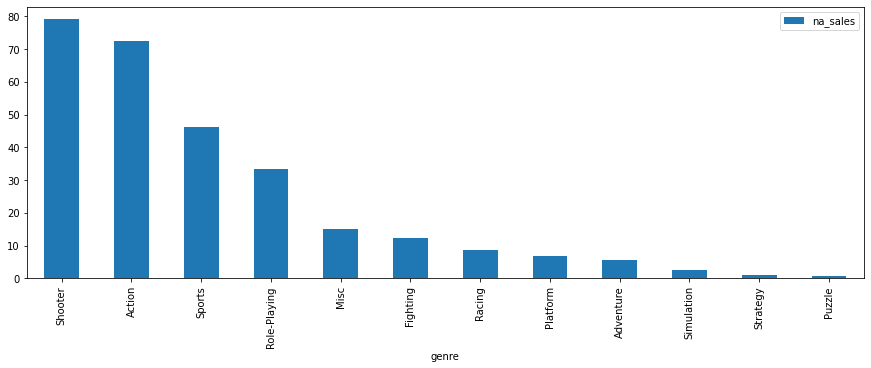

In [ ]:
actual_games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='genre'>

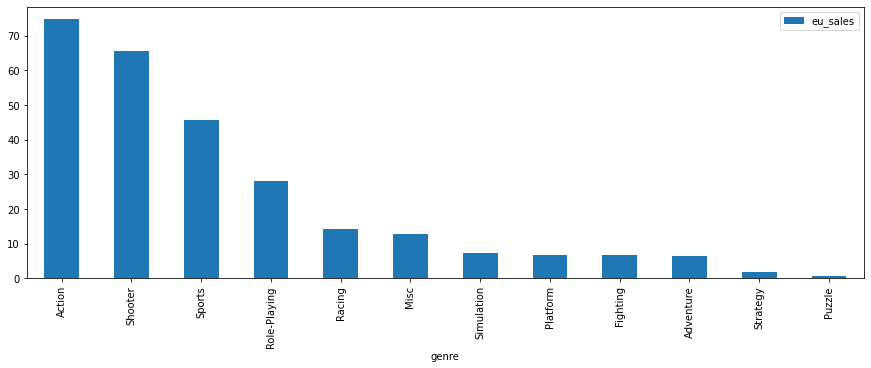

In [ ]:
actual_games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='genre'>

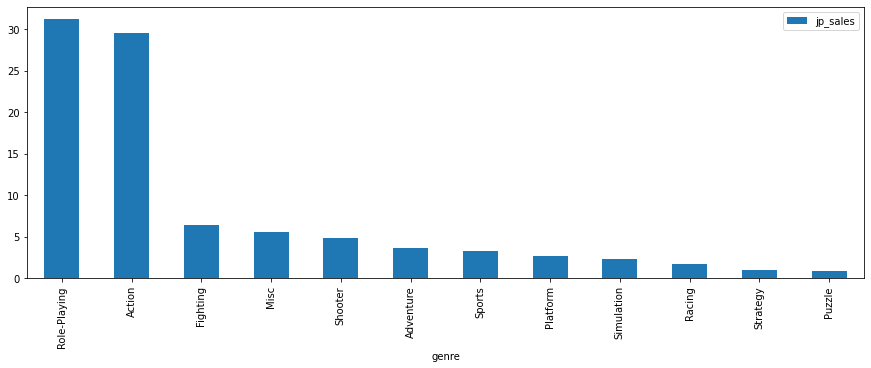

In [ ]:
actual_games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

Из графиков видно, что в Америке и Европе наиболее популярны жанры Action Shooter Sports, в Японии на первом месте RPG. Это обусловленно особой любовью японской аудитории к играм RPG и даже выделением отдельного направления JRPG, героями которого зачастую являются персонажи культовых мультфильмов.

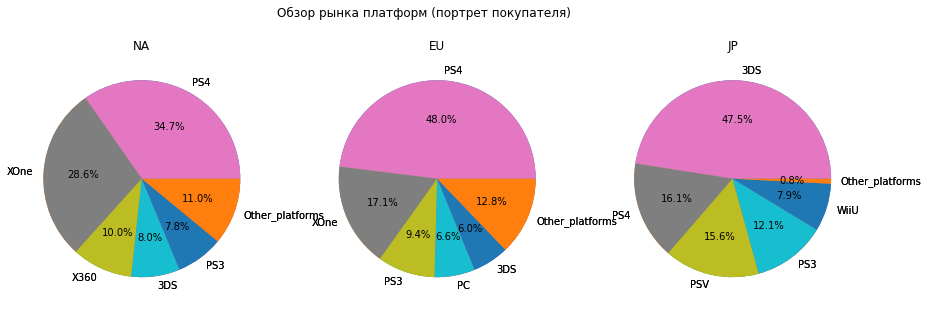

In [ ]:
countries = actual_games.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Обзор рынка платформ (портрет покупателя)')
for i in range(3):
  df_i = (actual_games.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

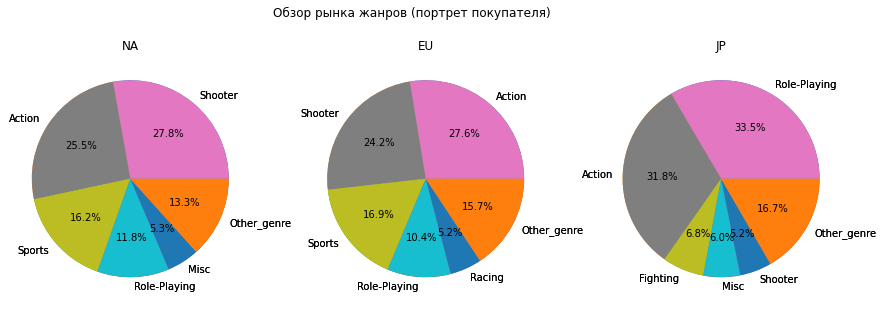

In [ ]:
countries = actual_games.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Обзор рынка жанров (портрет покупателя)')
for i in range(3):
  df_i = (actual_games.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<AxesSubplot:xlabel='rating'>

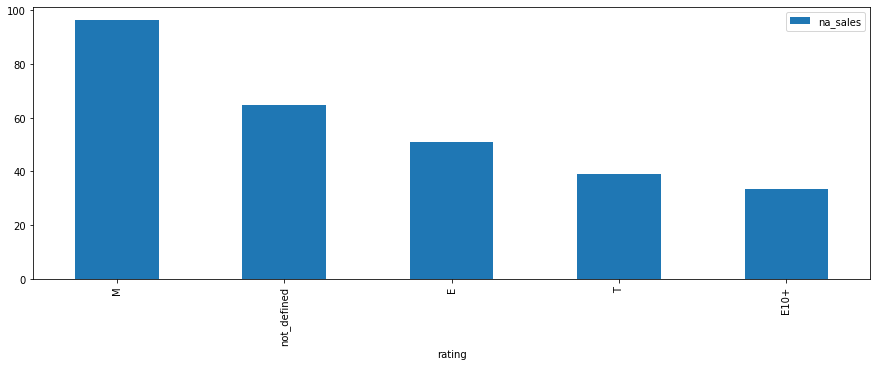

In [ ]:
actual_games.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='rating'>

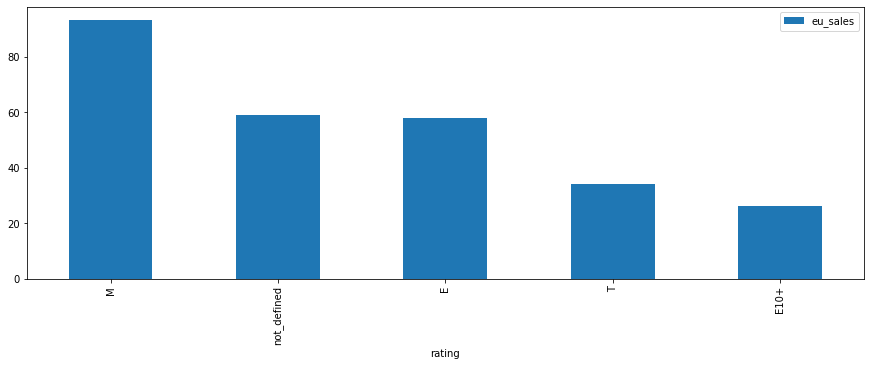

In [ ]:
actual_games.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

<AxesSubplot:xlabel='rating'>

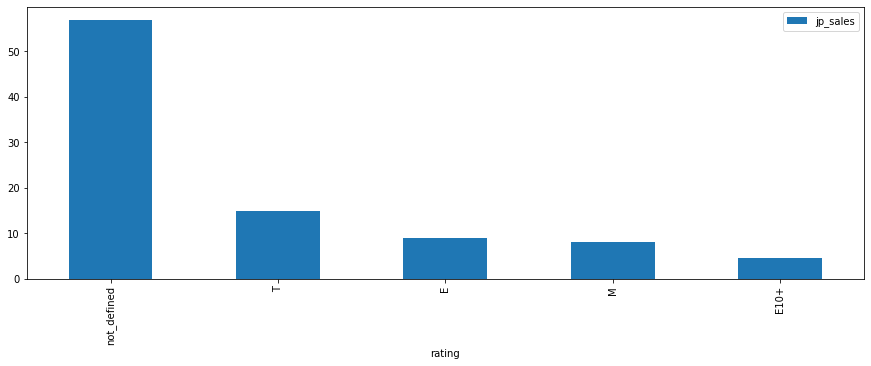

In [ ]:
actual_games.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

В Америке и Европе на первом месте игры для лиц старше 17 лет, в Японии подавляющее большинство игр с неопределенным рейтингом, что может быть обусловленно, тем, что для внутреннего рынка система ESRB не используется.

### Проверка гипотез

Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
 - проверяем гипотезу для данных за актуальный период, который мы определили выше
 - нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
 - альтернативная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC различны"
 - примем alpha=0.05 (стандартное из курса теории)
 - используем t-критерий Стьюдента (на основании материала, полученного в теоретическом курсе)

In [ ]:
sample_1 = actual_games[actual_games['platform']=="XOne"]['user_score'].dropna()
sample_2 = actual_games[actual_games['platform']=="PC"]['user_score'].dropna()

In [ ]:
from scipy.stats import levene
stat, p = levene(sample_1, sample_2)
p

0.014868430917663678

In [ ]:
alpha = 0.05

results_1 = st.ttest_ind(
    sample_1,
    sample_2,
    equal_var = True)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha): # код ревьюера
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод**: гипотезу не отвергаем, следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [ ]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные."

 - проверяем гипотезу для данных за актуальный период, который мы определили выше
 - нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
 - альтернативная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"
 - примем alpha=0.05 (чтандартное из курса теории)
 - используем t-критерий Стьюдента

In [ ]:
sample_3 = actual_games[actual_games['genre']=="Action"]['user_score'].dropna()
sample_4 = actual_games[actual_games['genre']=="Sports"]['user_score'].dropna()

In [ ]:
alpha = 0.05

results_2 = st.ttest_ind(
    sample_3,
    sample_4,
    equal_var = False)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод:
Работа была проведена в соответствии заданием и кратким планом, обозначенным в начале.


**В первую очередь** ознакомились с предоставленными данными, провели их обработку, очистили пропуски в объеме, который не искажает статистику, провели подготовку к дальнейшей работе по анализу.


**Вторым этапом** был исследовательский анализ, в ходе которого определили следующее:
 - наибольшие продажи за все время имеют платформы семейств SONY и Microsoft
 - пик продаж приходился на 2008-2009 г., после чего наступил резкий спад на фоне развития мобильных приложений
 - для прогноза на 2017 год и дальнейшего анализа актуальным периодом выбраны 2014-2016 г.г.
 - на основании актуального периода определили, что PS4, XOne, 3DS и PC являются наиболее перспективными платформами
 - определили, что оценки критиков и пользователей имеют прямую зависимость, в тоже время как корреляция межде оценками критиков и продажами слабая, а между оценками пользователей и продажами отсутсвует.
 - самыми продаваемыми жанрами являются Action, Shooter, RPG и Sports
 - выяснили, что рынки Северной Америки и Европы схожи и сильно отличаются от рынка Японии. В частности в Америке и Европе наиболее популярны платформы семейства PS и Xbox, которые занимают более 60% рынка. В Японии с большим отрывом лидирует 3DS, занимающая 47% рынка. В Америке и Европе наиболее популярны жанры Action и Shooter, которые занимают более 50% рынка. В Японии на первом месте RPG, на втором Action имеющие в сумме 65%.


**Третьим этапом** было составление портрета пользователя по регионам:
 - Северная Америка и Европа - это пользователь старше 17 лет, предпочитающий PS3/4 или Х360 и жанр Action либо Shooter
 - Япония - это пользователь неопределенного возраста, предпочитающий 3DS и жанр RPG


**Завершающим этапом** стала работа с гипотезами и как результат:
 - Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Отвергам гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.